# Project Module 3: Non-Linear Roots



$Ankit Rijal$

$Min Sun Kim$

$Tylar Gifford$

$CPSMA - 441301$

$Dr. Nicolas Jacob$


In [25]:
def newton_formula(function, derivative, value):
  root = value - function(value)/derivative(value)
  return root

def newton(function, derivative, initial, tolerrance, max_itrn):
  x = initial
  for count in range(max_itrn):
    if derivative(x) == 0:
      return None
    if abs(function(x))< tolerrance:
      return [x,count]
    x = newton_formula(function, derivative, x)
  return None

In [26]:
initial_seeds = [-20,-3,-2,-1,0,1,2,3,20]
roots = []
iterations = []
for seed in initial_seeds:
  newton_root = newton(math.exp,math.exp,seed,1e-10,20)
  if newton_root == None:
    roots.append('None')
    iterations.append('>20')
  else:
    roots.append(newton_root[0])
    iterations.append(newton_root[1])

In [27]:
#1(c) Table here

In [28]:
import math

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    
    header=dict(values=['Seeds', 'Roots', 'Iterations'],
                
                line_color='darkslategray',

                fill_color='orange',

                align='center'),

    cells=dict(values=[initial_seeds,roots ,iterations ],
               
               line_color='darkslategray',

               fill_color='white',

               align='center'))

])

fig.update_layout(width=1200, height=800)

fig.show()

Secant Method

In [29]:
def secant(function, olderValue, oldValue):
  x = oldValue - function(oldValue)*(oldValue - olderValue)/(function(oldValue)-function(olderValue))
  return x

def secantMethod(function, firstValue, secondValue, iterations):
  x = [firstValue, secondValue]
  for i in range(iterations): 
    x.append(secant(function,x[-2],x[-1]))
  return x

Lagrange Interpolation 

In [30]:
def lagrangeCoefficient(input,output,entry,x):
  lc = 1
  for i in range(len(input)):
    if i != entry:
      lc = lc*(x - input[i])/(input[entry]-input[i])
  return lc

def lagrangeInterpolator(input, output, x):
  li = 0
  for i in range(len(input)):
    li = li + lagrangeCoefficient(input,output,i,x)*output[i]
  return li

In [31]:
#calculating true output for each input and adding it on the list
input = [3, 3+0.1, 3+0.2, 3*2]
output = []
for x in input:
  output.append(math.exp(x))

In [32]:
#2(c)Graph here

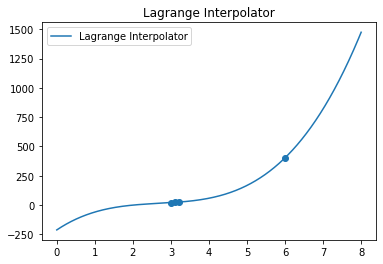

In [36]:
from matplotlib import pyplot as plot

import numpy as npy

x = npy.arange( 0,8,.001)

fig, ax = plot.subplots()

ax.plot(x, lagrangeInterpolator(input,output,x), label='Lagrange Interpolator')

ax.scatter(input, output)

# ax.plot(x, .5*(npy.exp(x)*2), label=r'$\frac{1}{2}$ exp(x)*2')

ax.set_title('Lagrange Interpolator')

ax.legend()